# 🔝 Top 10 Sliding Window Problems (LeetCode)
 - 1️⃣ 209 – Minimum Size Subarray Sum
 - 2️⃣ 1456 – Maximum Number of Vowels in a Substring of Given Length
 - 3️⃣ 2461 – Maximum Sum of Distinct Subarrays With Length K
 - 4️⃣ 643 – Maximum Average Subarray I
 - 5️⃣ 904 – Fruit Into Baskets
 - 6️⃣ 3 – Longest Substring Without Repeating Characters
 - 7️⃣ 1004 – Max Consecutive Ones III
 - 8️⃣ 76 – Minimum Window Substring
 - 9️⃣ 30 – Substring with Concatenation of All Words
 - 🔟 567 – Permutation in String ✅ (new, unique & perfect window type)


## ⚡ Categories:
- **Fixed window (length = k)** → #1456, #643  
- **Variable window (expand + shrink)** → #209, #3, #76  
- **Special constraints (distinct, limited chars)** → #904, #2461  



---

### 1. [209. Minimum Size Subarray Sum](https://leetcode.com/problems/minimum-size-subarray-sum/)  
👉 Smallest subarray with sum ≥ target  

---

Find the minimum length of subarray whose sum ≥ target.

target = 8  , nums = [2, 3, 5]

| Step | Left | Right | Current Window | Current Sum | Action / Result                                 |
| ---- | ---- | ----- | -------------- | ----------- | ----------------------------------------------- |
| 1    | 0    | 0     | [2]            | 2           | Sum < 8 → continue                              |
| 2    | 0    | 1     | [2,3]          | 5           | Sum < 8 → continue                              |
| 3    | 0    | 2     | [2,3,5]        | 10 ✅        | Sum ≥ 8 → update min_len = 3, now shrink window |
| 4    | 1    | 2     | [3,5]          | 8 ✅         | Sum ≥ 8 → update min_len = 2, shrink more       |
| 5    | 2    | 2     | [5]            | 5           | Sum < 8 → stop shrinking                        |

right → expand window (add more numbers)

left → shrink window (remove numbers from start)


In [44]:
from typing import List
class Solution:
    def minSubArray(self, target:int, nums:List[int])->int:
        n = len(nums)
        left = 0
        curr_sum = 0
        min_len = float("inf")
        for right in range(n): 
            curr_sum += nums[right] 
            while curr_sum >= target: 
                min_len = min(min_len, right - left + 1) 
                curr_sum -= nums[left] 
                left += 1
        return 0 if min_len == float("inf")  else min_len   
    
# Main function for testing
if __name__ == "__main__":    
    sol = Solution()    
    print(sol.minSubArray(8, [2,3,5]))   # Output: 2 (subarray [3,4])
    # Example test cases
    print(sol.minSubArray(7, [2,3,1,2,4,3]))   # Output: 2 (subarray [3,5])
    print(sol.minSubArray(4, [1,4,4]))         # Output: 1 (subarray [4])
    print(sol.minSubArray(11, [1,1,1,1,1,1,1])) # Output: 0 (no subarray ≥ 11)


2
2
1
0


# 
### 2. [1456. Maximum Number of Vowels in a Substring of Given Length](https://leetcode.com/problems/maximum-number-of-vowels-in-a-substring-of-given-length/)  
👉 Count max vowels in any substring of length k  

---

# Max Vowels Dry Run

s = "abciiidef", k = 3  
---
vowels = {'a', 'e', 'i', 'o', 'u'}

s[:k] = "abc"  # first window

count = 1      # vowels in "abc" → 'a'

max_count = 1
---
| Iteration | i | s[i] (entering) | s[i−k] (leaving) | **Previous Window** | **New Window** | Change in count           | New count | max_count |
| --------- | - | --------------- | ---------------- | ------------------- | -------------- | ------------------------- | --------- | --------- |
| 1         | 3 | `'i'`           | `'a'`            | `"abc"`             | `"bci"`        | +1 (for 'i') −1 (for 'a') | 1         | 1         |
| 2         | 4 | `'i'`           | `'b'`            | `"bci"`             | `"cii"`        | +1 (for 'i')              | 2         | 2         |
| 3         | 5 | `'i'`           | `'c'`            | `"cii"`             | `"iii"`        | +1 (for 'i')              | 3         | 3         |
| 4         | 6 | `'d'`           | `'i'`            | `"iii"`             | `"iid"`        | −1 (for 'i')              | 2         | 3         |
| 5         | 7 | `'e'`           | `'i'`            | `"iid"`             | `"ide"`        | +1 (for 'e') −1 (for 'i') | 2         | 3         |
| 6         | 8 | `'f'`           | `'i'`            | `"ide"`             | `"def"`        | −1 (for 'i')              | 1         | 3         |
---
| Substring | Vowels          | Count           |
| --------- | --------------- | --------------- |
| `"abc"`   | `'a'`           | 1               |
| `"bci"`   | `'i'`           | 1               |
| `"cii"`   | `'i', 'i'`      | 2               |
| `"iii"`   | `'i', 'i', 'i'` | **3 ← maximum** |
| `"iid"`   | `'i', 'i'`      | 2               |
| `"ide"`   | `'i', 'e'`      | 2               |
| `"def"`   | `'e'`           | 1               |


✅ **Final Answer:** 3  
Substring with max vowels: `"iii"`


In [49]:
class Solution:
    def maxVowels(self, s:str, k:int)-> int:
        vowels = set("aeiou")
        count = sum(1 for c in s[:k] if c in vowels)
        max_count = count
        for i in range(k,len(s)): # range(3,9)
            if s[i] in vowels:
                count += 1
            if s[i-k] in vowels:
                count -= 1
            max_count = max(max_count, count)
        return max_count  

# Example run
if __name__ == "__main__":
    s = "abciiidef"
    k = 3
    sol = Solution()
    result = sol.maxVowels(s, k)
print("\nReturned Result:", result)    
       




Returned Result: 3


s = "abciiidef", k = 3

First window s[:3] = "abc" → vowels = 1 (a)

Slide window right: s[1:4] = "bci"

New char = s[3] = 'i' → vowel → count += 1

Old char = s[0] = 'a' → vowel → count -= 1

This ensures the count always reflects the current window of size k.

---

### 3. [2461. Maximum Sum of Distinct Subarrays With Length K](https://leetcode.com/problems/maximum-sum-of-distinct-subarrays-with-length-k/)  
👉 Max sum when subarray length = k & all elements distinct  

nums = [1, 5, 4, 2, 9, 9, 9], k = 3


✅ Final Answer = 15


| Step | Right | Window before adding | Added num     | Window_sum             | Window after shrink     | Left | ans |
| ---- | ----- | -------------------- | ------------- | ---------------------- | ----------------------- | ---- | --- |
| 0    | 0     | {}                   | 1             | 1                      | [1]                     | 0    | 0   |
| 1    | 1     | [1]                  | 5             | 6                      | [1,5]                   | 0    | 0   |
| 2    | 2     | [1,5]                | 4             | 10                     | [5,4] → shrink left=0→1 | 1    | 10  |
| 3    | 3     | [5,4]                | 2             | 11                     | [4,2] → shrink left=1→2 | 2    | 11  |
| 4    | 4     | [4,2]                | 9             | 15                     | [2,9] → shrink left=2→3 | 3    | 15  |
| 5    | 5     | [2,9]                | 9 (duplicate) | 20 → remove 2 & shrink | [9]                     | 4    | 15  |
| 6    | 6     | [9]                  | 9 (duplicate) | 18 → remove 9 & shrink | [9]                     | 5    | 15  |



### Explanation in short:

Slide window from left to right.

Keep distinct elements in window.

Update window_sum as we add/remove elements.

When window size = k, update ans.

Handle duplicates by shrinking from left.

# Sliding Window Dry Run

nums = [1, 5, 4, 2], k = 3

| Step | Window             | left | right | Action                                | window_sum | ans |
|------|--------------------|------|-------|---------------------------------------|-------------|-----|
| 1    | [1, 5, 4]          | 0    | 2     | First window formed (size = k)        | 10          | 10  |
| 2    | [5, 4]             | 1    | 2     | Shrink → removed 1 (nums[left])       | 9           | 10  |
| 3    | [5, 4, 2]          | 1    | 3     | Add 2 (nums[3]) → window size = k     | 11          | 11  |


nums = [1, 5, 4, 2, 9, 9, 9], k = 3


| Iteration | right | nums[right] | In Window Already? | **Previous Window** | **New Window** | Action Taken                    | window_sum | ans    | left |
| --------- | ----- | ----------- | ------------------ | ------------------- | -------------- | ------------------------------- | ---------- | ------ | ---- |
| 1         | 0     | 1           | No                 | `[]`                | `[1]`          | Add 1                           | 1          | 0      | 0    |
|           |       |             |                    |                     |                | Window size = 1 ≠ k → continue  |            |        |      |
| 2         | 1     | 5           | No                 | `[1]`               | `[1,5]`        | Add 5                           | 6          | 0      | 0    |
|           |       |             |                    |                     |                | Window size = 2 ≠ k → continue  |            |        |      |
| 3         | 2     | 4           | No                 | `[1,5]`             | `[1,5,4]`      | Add 4 → Window full → Check sum | 10         | **10** | 0    |
|           |       |             |                    |                     |                | Remove leftmost (1) → `[5,4]`   | 9          | 10     | 1    |
| 4         | 3     | 2           | No                 | `[5,4]`             | `[5,4,2]`      | Add 2 → Window full → Check sum | 11         | **11** | 1    |
|           |       |             |                    |                     |                | Remove leftmost (5) → `[4,2]`   | 6          | 11     | 2    |
| 5         | 4     | 9           | No                 | `[4,2]`             | `[4,2,9]`      | Add 9 → Window full → Check sum | 15         | **15** | 2    |
|           |       |             |                    |                     |                | Remove leftmost (4) → `[2,9]`   | 11         | 15     | 3    |
| 6         | 5     | 9           | **Yes**            | `[2,9]`             | `[2,9]`        | Duplicate found → Shrink window | 9          | 15     | 5    |
|           |       |             |                    |                     | `[9]`          | Add 9 → Continue                | 9          | 15     | 5    |
| 7         | 6     | 9           | **Yes**            | `[9]`               | `[9]`          | Duplicate found → Shrink window | 9          | 15     | 6    |
|           |       |             |                    |                     | `[9]`          | Add 9 → Continue                | 9          | 15     | 6    |


In [29]:
class Solution:
      def maximumSubarraySum(self, nums,k):
            window_sum , ans = 0,0
            window = set()
            left = 0
            for right in range(len(nums)):
                while nums[right] in window:
                    window.remove(nums[left])
                    window_sum -=nums[left]
                    left += 1

                window.add(nums[right])
                window_sum += nums[right] 
                if right - left + 1 == k:
                    ans = max(ans, window_sum)
                    window.remove(nums[left])
                    window_sum -= nums[left]
                    left += 1
            return ans   
# -------------------------
# Run test case
# -------------------------
if __name__ == "__main__":
    nums = [1, 5, 4, 2, 9, 9, 9]
    sol = Solution()
    result = sol.maximumSubarraySum(nums, k)
    print("Final Answer:", result)     

                     

Final Answer: 15


---

### 4. [643. Maximum Average Subarray I](https://leetcode.com/problems/maximum-average-subarray-i/)  
👉 Find subarray of length k with maximum average  


# Dry Run: Maximum Average Subarray I

nums = [1, 12, -5, -6, 50, 3], k = 4

| Step | Window              | Operation (Add / Remove) | window_sum | max_sum |
|------|---------------------|---------------------------|-------------|---------|
| 1    | [1, 12, -5, -6]     | Initial sum               | 2           | 2       |
| 2    | [12, -5, -6, 50]    | +50, -1                   | 51          | 51      |
| 3    | [-5, -6, 50, 3]     | +3, -12                   | 42          | 51      |

✅ Final Answer = 51 / 4 = **12.75**


In [32]:
from typing import List 
class Solution:
    def findMaxAverage(self, nums:List[int], k: int)-> float:
        window_sum = sum(nums[:k])
        max_sum = window_sum
        for i in range(k,len(nums)):  #range(4,6)
            window_sum +=nums[i] - nums[i-k]
            max_sum = max(max_sum, window_sum)
        return max_sum / k  
    
if __name__ == "__main__":
    nums = [1, 12, -5, -6, 50, 3]
    k = 4
    sol = Solution()
    result = sol.findMaxAverage(nums, k)
    print("Final Answer:", result)     
     

Final Answer: 12.75


---

### 5. [904. Fruit Into Baskets](https://leetcode.com/problems/fruit-into-baskets/)  
👉 Longest subarray with at most 2 distinct numbers  

We have 2 baskets, each can hold only 1 type of fruit. We want the longest consecutive sequence with at most 2 fruit types.

Input: fruits = [1, 2, 1, 2, 3, 2, 2]

fruits = [1,2,3,2,2]

# Fruit Into Baskets Algorithm Dry Run

## Input: `fruits = [1, 2, 1, 2, 3, 2, 2]`

| Step | Right Index | Current Fruit | Window State | Fruit Count | Action Taken | Left Pointer | Max Length |
|------|-------------|---------------|--------------|-------------|--------------|-------------|------------|
| 1 | 0 | 1 | [1] | {1:1} | Add fruit 1 | 0 | 1 |
| 2 | 1 | 2 | [1,2] | {1:1, 2:1} | Add fruit 2 | 0 | 2 |
| 3 | 2 | 1 | [1,2,1] | {1:2, 2:1} | Add fruit 1 | 0 | 3 |
| 4 | 3 | 2 | [1,2,1,2] | {1:2, 2:2} | Add fruit 2 | 0 | 4 |
| 5 | 4 | 3 | [1,2,1,2,3] | {1:2, 2:2, 3:1} | **Too many types! Start shrinking** | 0→3 | 4 |

## Shrinking Process (Step 5 Detail):

| Shrink Step | Remove Fruit | New Window | New Count | Types Count | Status |
|-------------|--------------|------------|-----------|-------------|--------|
| 5.1 | fruits[0]=1 | [2,1,2,3] | {1:1, 2:2, 3:1} | 3 | ❌ Still 3 types |
| 5.2 | fruits[1]=2 | [1,2,3] | {1:1, 2:1, 3:1} | 3 | ❌ Still 3 types |
| 5.3 | fruits[2]=1 | [2,3] | {2:1, 3:1} | 2 | ✅ Valid |

| Step | Right Index | Current Fruit | Window State | Fruit Count | Action Taken | Left Pointer | Max Length |
|------|-------------|---------------|--------------|-------------|--------------|-------------|------------|
| 6 | 5 | 2 | [2,3,2] | {2:2, 3:1} | Add fruit 2 | 3 | 4 |
| 7 | 6 | 2 | [2,3,2,2] | {2:3, 3:1} | Add fruit 2 | 3 | 4 |

## Final Result:
**Maximum consecutive fruits with at most 2 types = 4**

## Valid Windows Found:
- `[1, 2, 1, 2]` (indices 0-3)
- `[2, 3, 2, 2]` (indices 3-6)

## Algorithm Summary:
- **Expand** window from right
- **Shrink** from left when >2 fruit types
- **Track** maximum valid window length
- **Time Complexity**: O(n)
- **Space Complexity**: O(1)

### 🍇 Key Points — `if count[fruits[left]] == 0: del count[fruits[left]]`

1. **Purpose:**  
   Removes fruit types that are no longer in the current sliding window.

2. **When it runs:**  
   Only after we shrink the window (move `left` pointer) and a fruit’s count becomes 0.

3. **Why it’s needed:**  
   The dictionary `count` must represent **only the fruits currently in the window**.  
   If we leave keys with zero count, `len(count)` will be wrong.

4. **Logic pattern:**  
   - Add fruit when expanding window → `count[fruit] += 1`  
   - Subtract fruit when shrinking window → `count[fruit] -= 1`  
   - **If count = 0 → delete it**

5. **Easy memory line:**  
   > 🧠 “If count hits zero — delete the hero.” 🦸‍♂️

6. **Used in:**  
   - 🍎 Fruits Into Baskets  
   - 🔠 Longest Substring with K Distinct Characters  
   - 💬 Sliding Window problems using a dictionary or hashmap


In [34]:
from typing import List
from collections import defaultdict

class Solution:
    def totalFruit(self, fruits: List[int]) -> int:
        left = 0
        count = defaultdict(int)
        max_len = 0
        for right , fruit in enumerate(fruits):
            count[fruit] += 1
            while len(count) > 2: # if more than 2 types ,shrink from left
                count[fruits[left]] -= 1
                if count[fruits[left]] == 0: #{1:0, 2:1, 3:1} it becomes {2:1, 3:1}
                    del count[fruits[left]]
                left += 1
            max_len = max(max_len,right-left+1)  
        return max_len  
if __name__ == "__main__":
    nums = [1, 2, 1, 2, 3]
    sol = Solution()
    result = sol.totalFruit(nums)
    print("Final Answer:", result)     
                 



Final Answer: 4


---

### 6. [3. Longest Substring Without Repeating Characters](https://leetcode.com/problems/longest-substring-without-repeating-characters/)  
👉 Longest substring with all distinct characters 

## 🔑 Key Points

- Use a **Sliding Window** with two pointers: `left` and `right`.
- Use a **set** to keep track of characters in the current window.
- If a repeating character is found → **shrink window** from the left.
- Update the maximum length after each step.

# Dry Run of `lengthOfLongestSubstring("abcabcbb")`

| Step | right | s[right] | seen (before) | Action                        | left | Window    | ans |
|------|-------|----------|---------------|-------------------------------|------|-----------|-----|
| 1    | 0     | 'a'      | {}            | Add 'a'                       | 0    | "a"       | 1   |
| 2    | 1     | 'b'      | {'a'}         | Add 'b'                       | 0    | "ab"      | 2   |
| 3    | 2     | 'c'      | {'a','b'}     | Add 'c'                       | 0    | "abc"     | 3   |
| 4    | 3     | 'a'      | {'a','b','c'} | Duplicate → remove 'a'        | 1    | "bca"     | 3   |
| 5    | 4     | 'b'      | {'b','c','a'} | Duplicate → remove 'b'        | 2    | "cab"     | 3   |
| 6    | 5     | 'c'      | {'c','a','b'} | Duplicate → remove 'c'        | 3    | "abc"     | 3   |
| 7    | 6     | 'b'      | {'a','b','c'} | Duplicate → remove 'a','b'    | 5    | "cb"      | 3   |
| 8    | 7     | 'b'      | {'c','b'}     | Duplicate → remove 'c','b'    | 7    | "b"       | 3   |


## Final Answer: **3**


In [35]:
from typing import List

class Solution:
    def lengthOfLongestSubstring(self, s:str) -> int:
        seen = set()
        left , ans = 0, 0
        for right in range(len(s)):
            while s[right] in seen:
                seen.remove(s[left])
                left += 1
            seen.add(s[right])
            ans = max(ans, right - left +1)
        return ans  
sol = Solution()
print(sol.lengthOfLongestSubstring("abcabcbb"))         


3


# 
---

### 7. [1004. Max Consecutive Ones III](https://leetcode.com/problems/max-consecutive-ones-iii/)  

🔥 Longest Ones After Flipping k Zeros — Sliding Window Explanation

🧩 Problem

You are given a binary array nums (only 0s and 1s) and an integer k.
You can flip at most k zeros → to ones.
Find the length of the longest subarray containing only 1s after flipping at most k zeros.



### Description

- Given an array `nums` of 0s and 1s.  
- Given an integer `k` = maximum number of 0s you can flip to 1s.  
- Find the **length of the longest contiguous subarray** of 1s after flipping at most `k` zeros.

---



### Hints
- Use the sliding window approach:
- Maintain two pointers left and right for the window.
- Count zeros inside the current window.
- If zeros > k → shrink the window from the left until zeros ≤ k.
- Keep track of the maximum window length.

| Step | right | nums[right] | Action                     | zeros | left | Window (indices) | Window Content | max_len |
| ---- | ----- | ----------- | -------------------------- | ----- | ---- | ---------------- | -------------- | ------- |
| 1    | 0     | 1           | valid                      | 0     | 0    | [0]              | [1]            | 1       |
| 2    | 1     | 1           | valid                      | 0     | 0    | [0–1]            | [1,1]          | 2       |
| 3    | 2     | 1           | valid                      | 0     | 0    | [0–2]            | [1,1,1]        | 3       |
| 4    | 3     | 0           | add zero                   | 1     | 0    | [0–3]            | [1,1,1,0]      | 4       |
| 5    | 4     | 0           | add zero                   | 2     | 0    | [0–4]            | [1,1,1,0,0]    | 5       |
| 6    | 5     | 0           | zeros>k → shrink from left | 3→2   | 4    | [4–5]            | [0,0]          | 5       |
| 7    | 6     | 1           | valid                      | 2     | 4    | [4–6]            | [0,0,1]        | 5       |
| 8    | 7     | 1           | valid                      | 2     | 4    | [4–7]            | [0,0,1,1]      | 6       |
| 9    | 8     | 1           | valid                      | 2     | 4    | [4–8]            | [0,0,1,1,1]    | 7       |
| 10   | 9     | 1           | valid                      | 2     | 4    | [4–9]            | [0,0,1,1,1,1]  | 8       |
| 11   | 10    | 0           | zeros>k → shrink from left | 3→2   | 5    | [5–10]           | [0,1,1,1,1,0]  | 8       |


# ✅ Final Answer
**max_len = 6**

---

## 🔹 Shrinking Step Detailed (Step 6)

**Current situation before shrinking:**

- `right = 5 → nums[5] = 0`
- `zeros = 3 (> k)`
- `left = 0`
- `window = [1,1,1,0,0,0] (indexes 0–5)`

**Shrink one by one from left:**

1. `left = 0 → nums[0] = 1` → not zero → move left to 1 → zeros = 3  
   Window = `[1,1,0,0,0]`

2. `left = 1 → nums[1] = 1` → not zero → move left to 2 → zeros = 3  
   Window = `[1,0,0,0]`

3. `left = 2 → nums[2] = 1` → not zero → move left to 3 → zeros = 3  
   Window = `[0,0,0]`

4. `left = 3 → nums[3] = 0` → remove zero → zeros = 2 ✅ stop shrinking  
   Window = `[0,0] (indexes 4–5)`


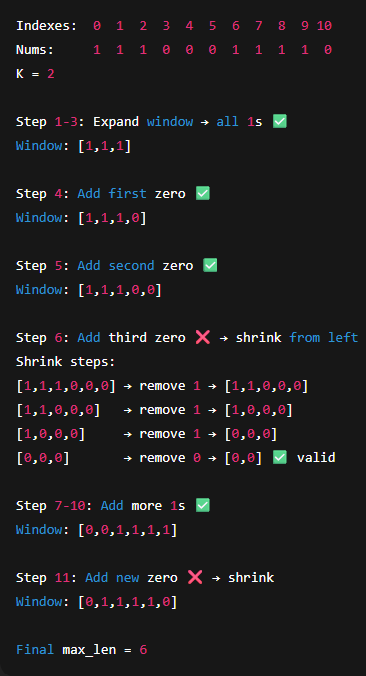

In [38]:
from typing import List

class Solution:
    def longestOnes(self, nums:List[int], k: int)-> int:
        left = 0
        max_len = 0
        zeros = 0
        for right in range(len(nums)):
            if nums[right] == 0:
                zeros += 1
            while zeros > k:
                if nums[left] == 0:
                    zeros -= 1
                left += 1
            max_len = max(max_len, right - left + 1) 
        return max_len           

# Example run
if __name__ == "__main__":
    nums = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]
    k = 2  # Maximum zeros we can flip
    sol = Solution()
    result = sol.longestOnes(nums, k)
    print("Maximum length of subarray with at most k zeros flipped:", result)   

Maximum length of subarray with at most k zeros flipped: 7


### How to Think About It

Sliding window approach works best:

Start with left = 0 and right = 0.

Expand right to include elements.

Count zeros in the current window.

If zeros > k → shrink window from left until zeros ≤ k.

Keep track of max_len = right - left + 1.


---

### 8. [76. Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/)  
👉 Smallest substring of s that contains all characters of t  



---

### 9. [30. Substring with Concatenation of All Words](https://leetcode.com/problems/substring-with-concatenation-of-all-words/)  
👉 Find all starting indices of substring formed by all words concatenated  



---

### 10. 567. – Permutation in String ✅ (new, unique & perfect window type)
